## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Load dataset

In [2]:
read_patient_frame = pd.read_csv('Paitients_Files_Train.csv')
patient_frame = read_patient_frame[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Sepssis']]

## Clear Null datas

In [3]:
patient_frame.isnull().any()

PRG        False
PL         False
PR         False
SK         False
TS         False
M11        False
BD2        False
Age        False
Sepssis    False
dtype: bool

## Shape

In [4]:
print(patient_frame.shape)

(599, 9)


## Head

In [5]:
patient_frame.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


## Info

In [6]:
patient_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


## Descriptions

In [7]:
patient_frame.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Class distributions of Sepssis

In [8]:
patient_frame.groupby('Sepssis').size()

Sepssis
Negative    391
Positive    208
dtype: int64

## Maximum value of each attribute

In [9]:
pd.DataFrame.max(patient_frame)

PRG              17
PL              198
PR              122
SK               99
TS              846
M11            67.1
BD2            2.42
Age              81
Sepssis    Positive
dtype: object

## Minimum value of each attribute

In [10]:
pd.DataFrame.min(patient_frame)

PRG               0
PL                0
PR                0
SK                0
TS                0
M11             0.0
BD2           0.078
Age              21
Sepssis    Negative
dtype: object

## Mean value of attributes

In [11]:
pd.DataFrame.mean(patient_frame, numeric_only = True)

PRG      3.824708
PL     120.153589
PR      68.732888
SK      20.562604
TS      79.460768
M11     31.920033
BD2      0.481187
Age     33.290484
dtype: float64

## Median value of attributes

In [12]:
pd.DataFrame.median(patient_frame, numeric_only = True)

PRG      3.000
PL     116.000
PR      70.000
SK      23.000
TS      36.000
M11     32.000
BD2      0.383
Age     29.000
dtype: float64

## Histograms

<Figure size 640x480 with 0 Axes>

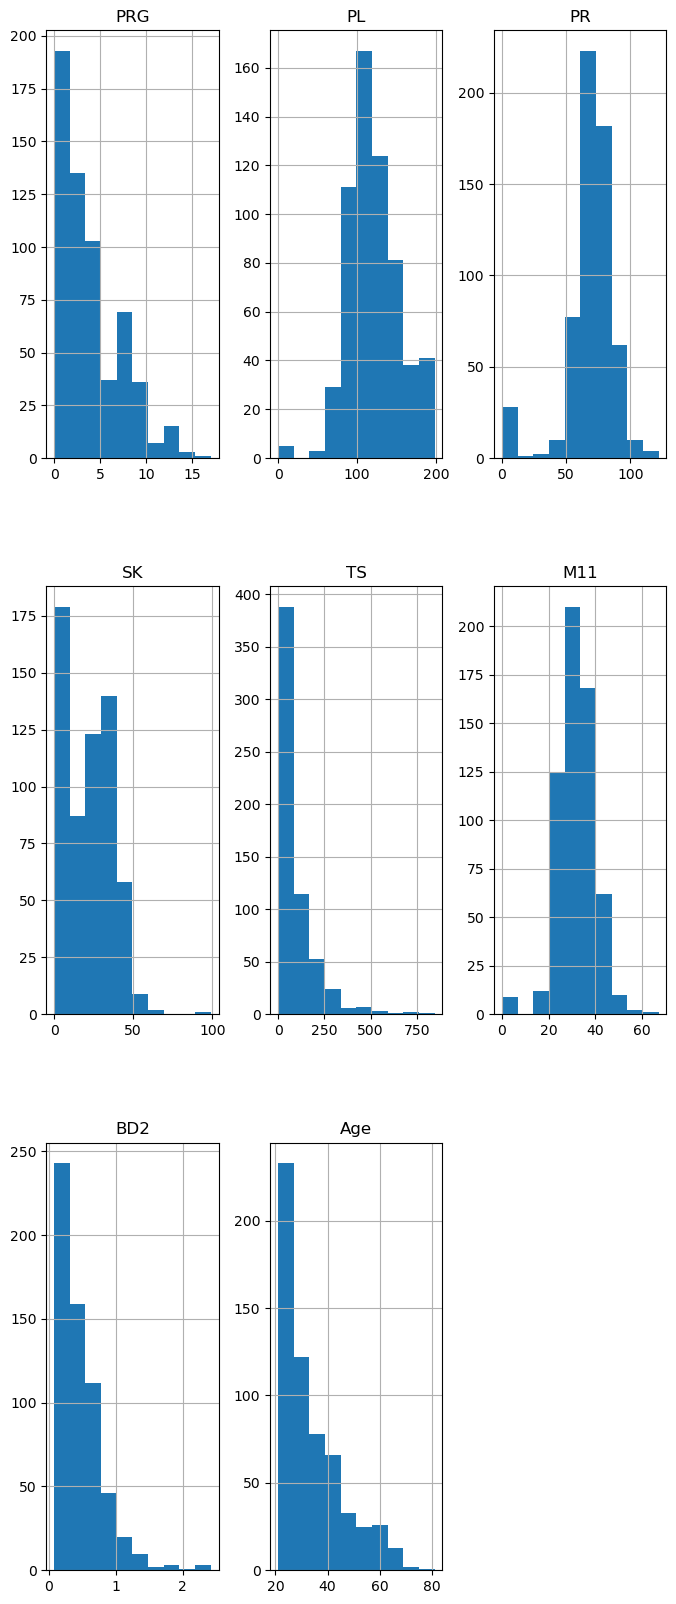

In [13]:
plt.figure()
patient_frame.hist(figsize=(8,20))
plt.show()

## box and whisker plots

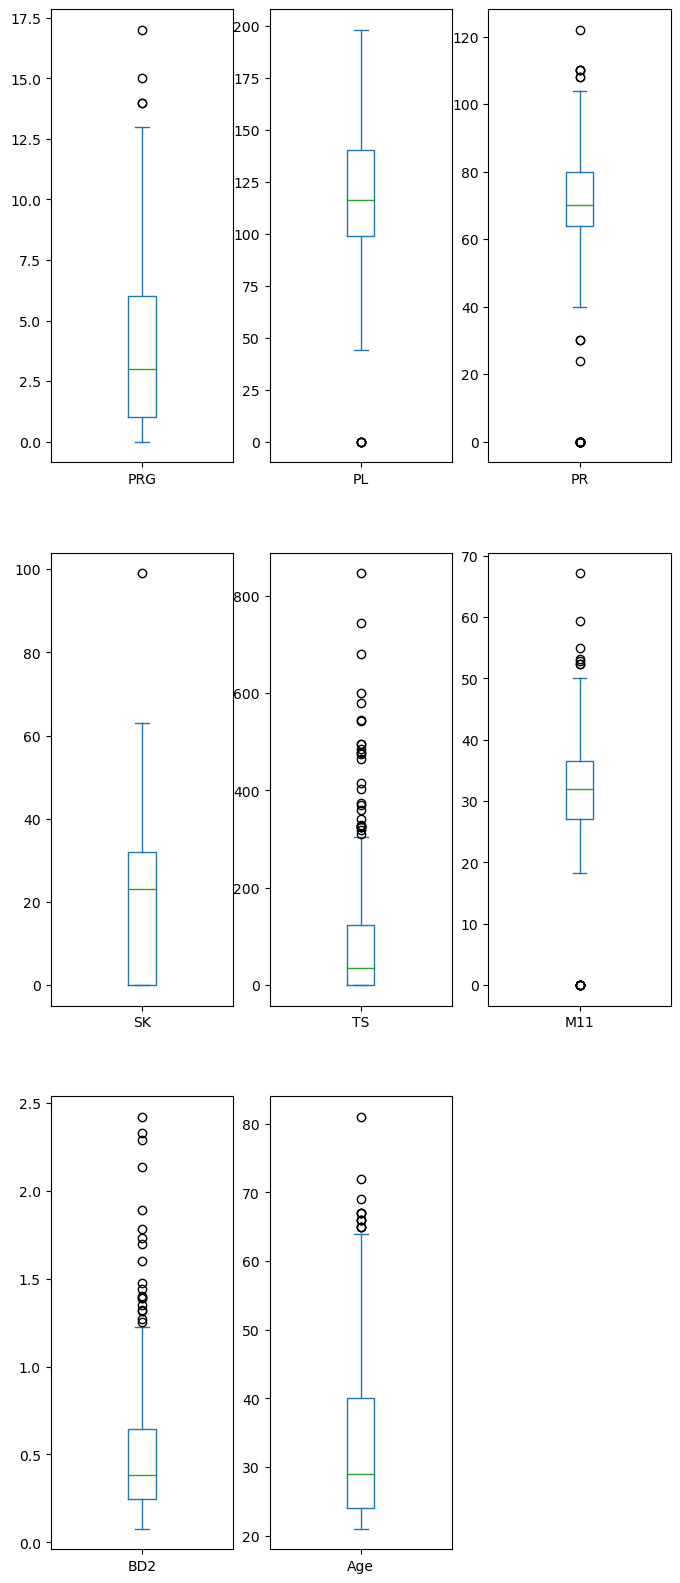

In [14]:
patient_frame.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,20))
plt.show()

## Heatmap plot

<Axes: >

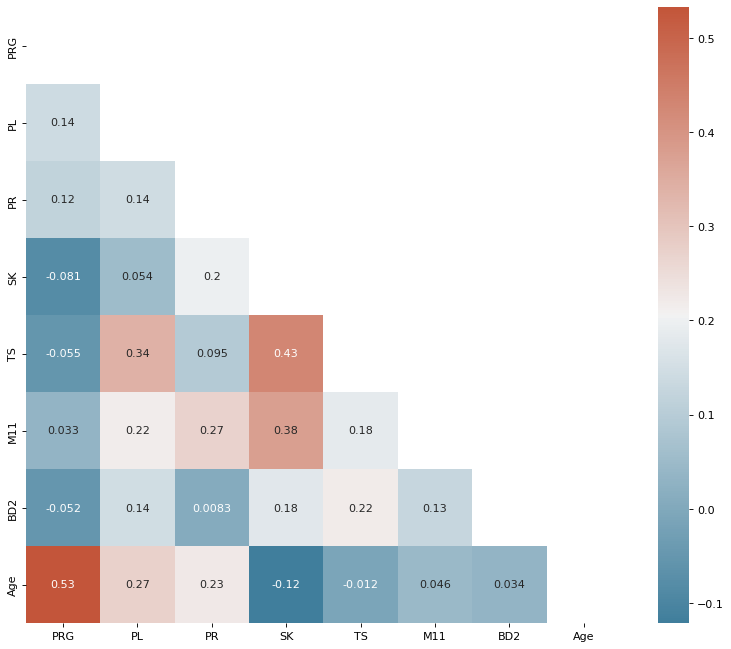

In [15]:
#Correlation between variables
corr = patient_frame.corr(numeric_only = True)

#Set up matplotlib for configuration
f, ax = plt.subplots(figsize=(12,10), dpi=80)

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Group the dataset with Sepssis

In [16]:
case = patient_frame.groupby('Sepssis')

neg_case = case.get_group('Negative')
pos_case = case.get_group('Positive')

## Box plots between Negative and Positive cases

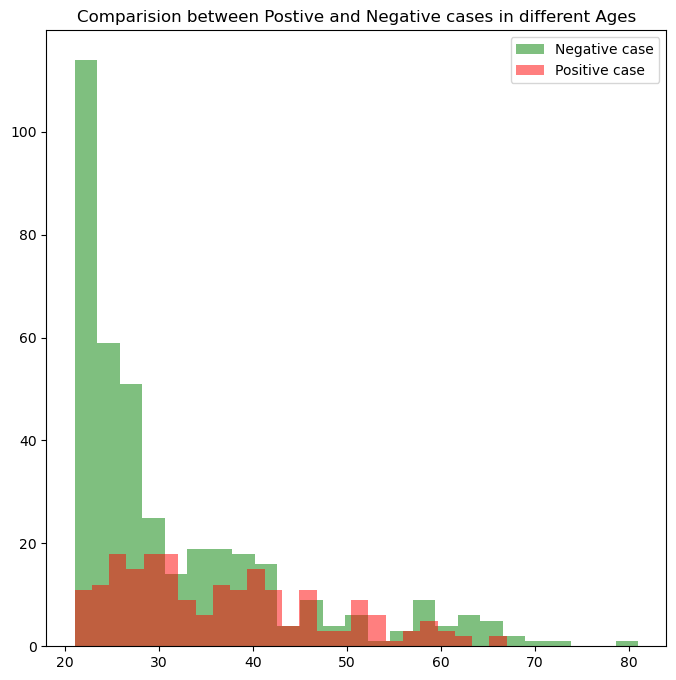

In [17]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['Age'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['Age'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in different Ages")
plt.legend(['Negative case', 'Positive case'])

plt.show()

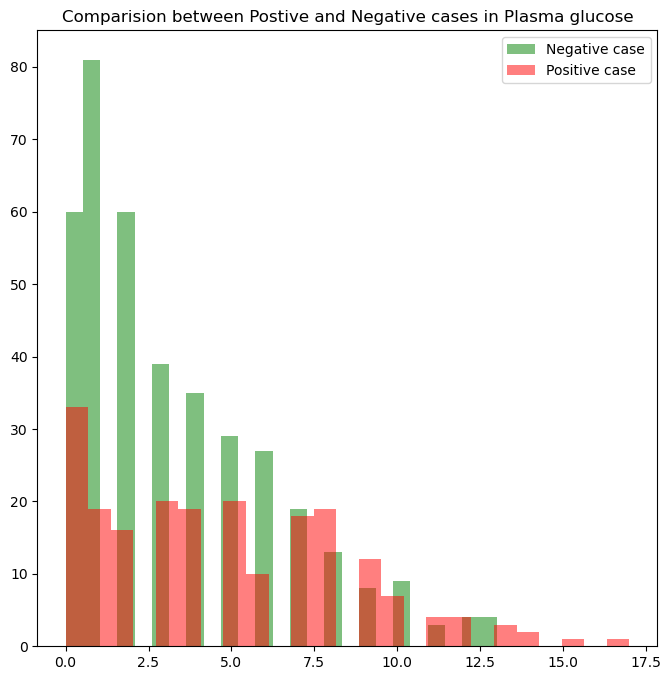

In [18]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['PRG'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['PRG'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Plasma glucose")
plt.legend(['Negative case', 'Positive case'])

plt.show()

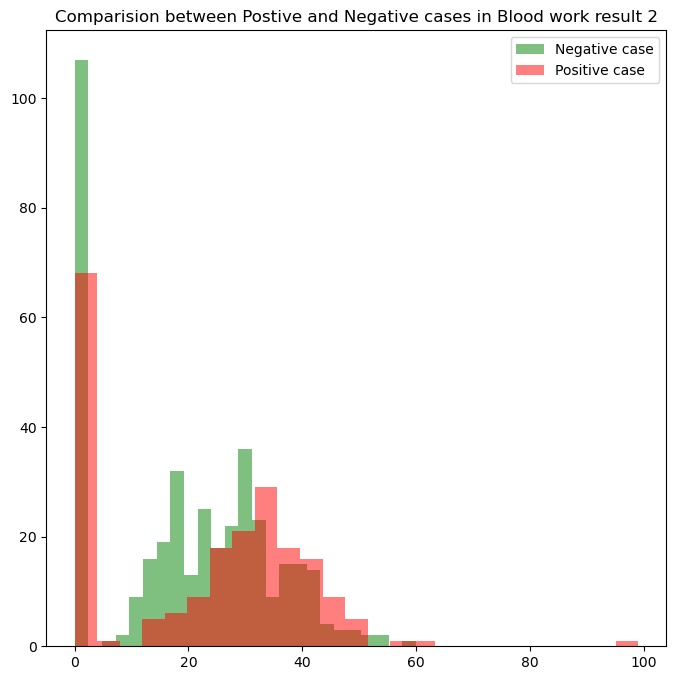

In [19]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['SK'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['SK'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Blood work result 2")
plt.legend(['Negative case', 'Positive case'])

plt.show()

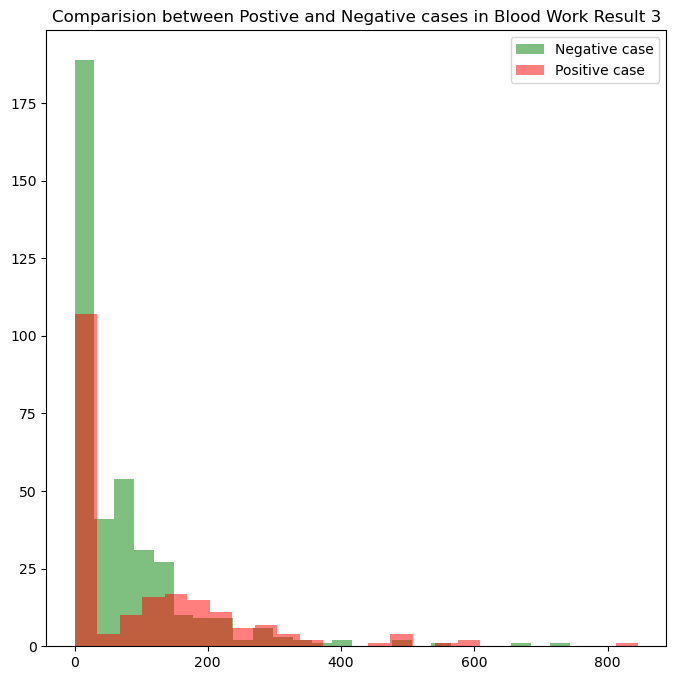

In [20]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['TS'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['TS'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Blood Work Result 3")
plt.legend(['Negative case', 'Positive case'])

plt.show()

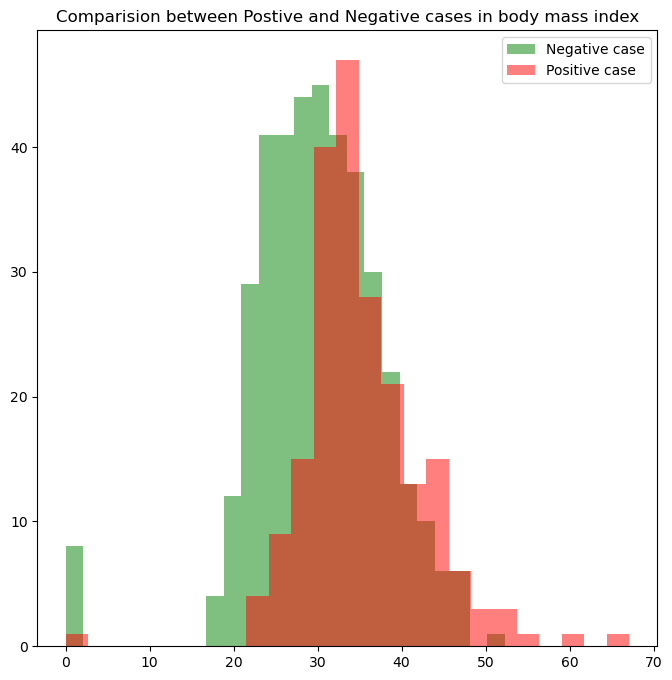

In [21]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['M11'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['M11'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in body mass index")
plt.legend(['Negative case', 'Positive case'])

plt.show()

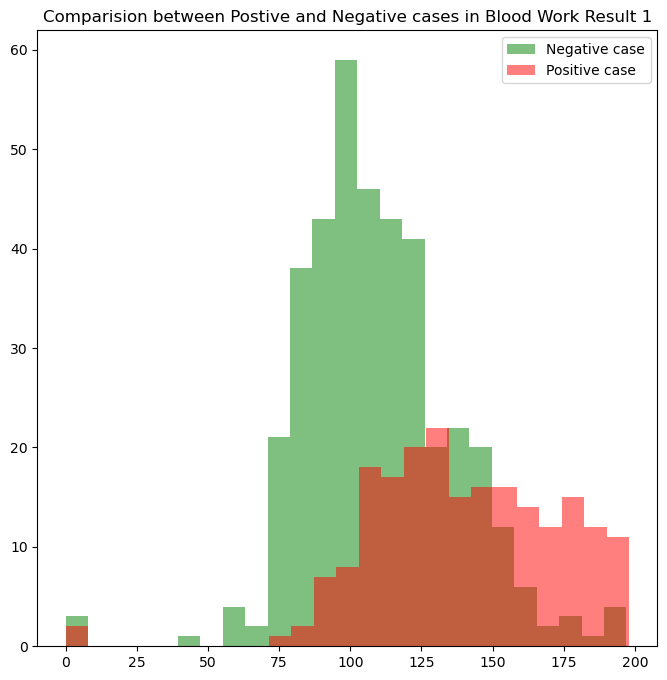

In [22]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['PL'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['PL'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Blood Work Result 1")
plt.legend(['Negative case', 'Positive case'])

plt.show()

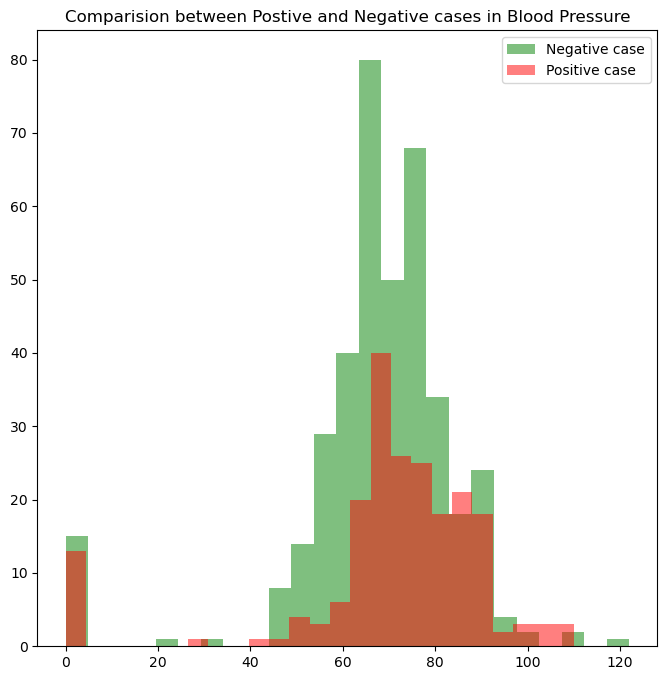

In [23]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['PR'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['PR'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Blood Pressure")
plt.legend(['Negative case', 'Positive case'])

plt.show()

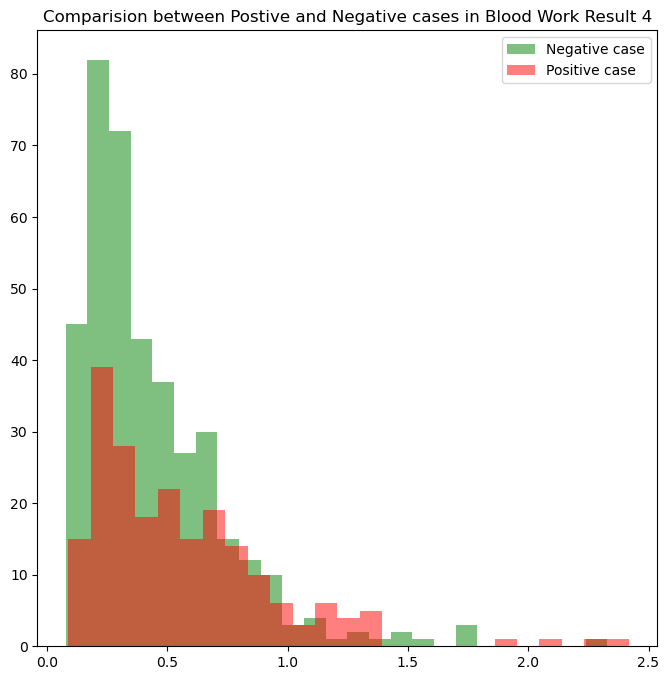

In [24]:
plt.figure(figsize=(8,8))

plt.hist(neg_case['BD2'], bins = 25, alpha = 0.5, color = 'green')
plt.hist(pos_case['BD2'], bins = 25, alpha = 0.5, color = 'red')

plt.title("Comparision between Postive and Negative cases in Blood Work Result 4")
plt.legend(['Negative case', 'Positive case'])

plt.show()

## Logistic Regression

### Create numpy arrays for regression by splitting data

In [25]:
X = np.array(patient_frame[['PRG','Age', 'PL', 'PR', 'SK', 'TS', 'M11','BD2']])
y = np.array(patient_frame['Sepssis'].replace({'Negative': 0, 'Positive': 1}))

### Split data to train and test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Feature Scaling

In [27]:
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)


### Validation Features

### Fit/Train model

In [28]:
classifier = LogisticRegression(max_iter=600)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=600)

### Predictions

In [29]:
y_pred = classifier.predict(X_test_normalized)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
175       0          0
176       0          0
177       0          0
178       0          0
179       1          0

[180 rows x 2 columns]


### Evaluate Model

#### Define confusion matrix

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

Confusion Matrix 
 [[113   0]
 [ 67   0]]


#### Heatmap of the model

Text(0.5, 23.52222222222222, 'Predicted label')

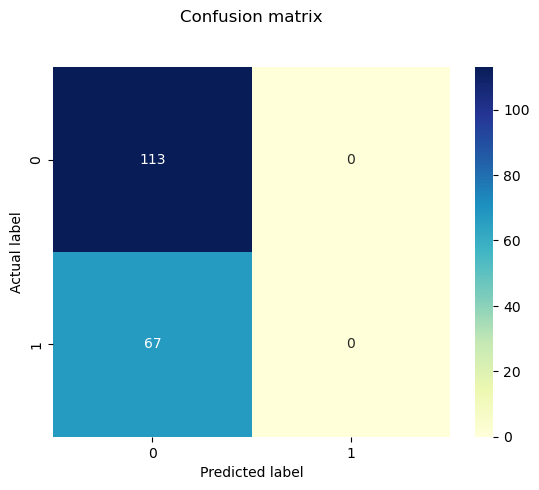

In [31]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### The accuracy

In [32]:
print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')

Accuracy of model
62.77777777777778 %


In [34]:
y_train_2 = classifier.predict(X_train_normalized)
print(accuracy_score(y_train, y_train_2) * 100, '%')

66.34844868735084 %


#### Classification report

In [ ]:
target_names = ['Negative', 'Positive']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))

## Load Test Dataset

In [ ]:
read_patient_frame = pd.read_csv('Paitients_Files_Test.csv')
test_patient_frame = read_patient_frame[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']]

## Plot data and hypotheses